In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_selected = df[['SPX', 'GLD', 'USO','SLV']]
df_scaled = scaler.fit_transform(df_selected)
df_scaled = pd.DataFrame(df_scaled, columns=['SPX', 'GLD', 'USO','SLV'])

In [8]:
df_scaled

,SPX,GLD,USO,SLV
0,-0.399145,-1.626963,2.388810,-0.691720
1,-0.399145,-1.596463,2.383687,-0.676912
2,-0.467604,-1.615365,2.329381,-0.693553
3,-0.458837,-1.630830,2.236652,-0.709630
4,-0.508915,-1.544483,2.265342,-0.633900
...,...,...,...,...
2285,1.960708,0.079779,-0.911009,-0.645182
2286,2.010555,0.068610,-0.895128,-0.642361
2287,2.059264,0.105125,-0.893078,-0.612747
2288,2.072867,0.075483,-0.894615,-0.638131


In [13]:
x=df_scaled.drop(['GLD'], axis=1)
y=df_scaled['GLD']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestRegressor()

Mean Squared Error: 0.016365168942768328
R^2 Score: 0.9838265222771928


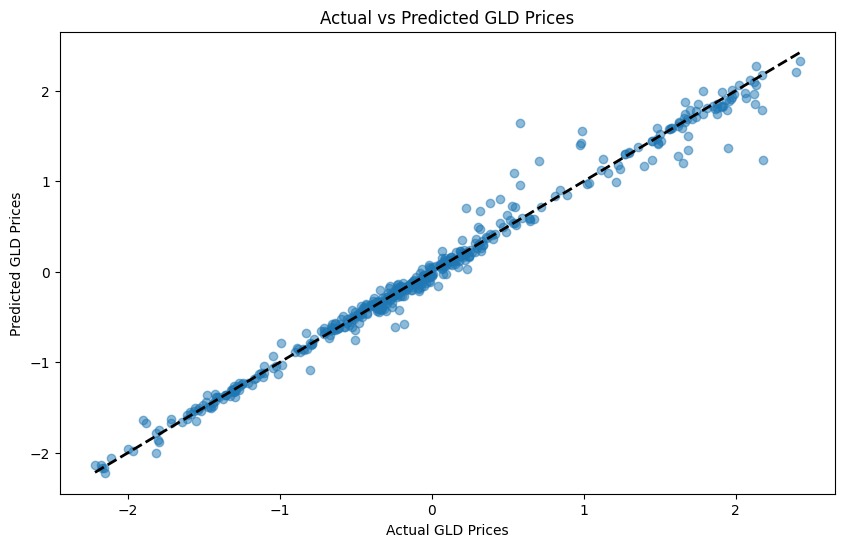

In [15]:
y_pred = rf.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual GLD Prices')
plt.ylabel('Predicted GLD Prices')
plt.title('Actual vs Predicted GLD Prices')
plt.show()